In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
signal_files=['UNM_sample_df.pkl','h5mC_sample_df.pkl','m5C_sample_df.pkl','m6A_sample_df.pkl','pU_sample_df.pkl',
             'pU_stoch_sample_df.pkl']
datadir='/home/tcastiglione/data'
data_paths=[os.path.join(datadir,file) for file in signal_files]
data_sample_df=pd.concat((pd.read_pickle(path) for path in data_paths), ignore_index=True)

In [3]:
tailres_files=['UNM_54_sample.csv','h5mC_1_sample.csv','m5C_5_sample.csv','m6A_54_sample.csv', 'pU_1_sample.csv',
            'pU_stoch_5_sample.csv']
tailfindr_paths=[os.path.join(datadir,file) for file in tailres_files]
tail_sample_df=pd.concat((pd.read_csv(path) for path in tailfindr_paths), ignore_index=True)

In [4]:
tail_sample_df['read_id'] ='read_'+tail_sample_df['read_id'].astype(str)

In [5]:
data_sample_df['signal_length']=data_sample_df['signal'].str.len()
data_sample_df['seq_length']=data_sample_df['seq_fastq'].str.len()

In [6]:
#tail_sample_df=tail_sample_df.loc[tail_sample_df['read_id']==data_sample_df['read_id']]
data_sample_df=data_sample_df.merge(tail_sample_df,how='inner',on='read_id')
data_sample_df=data_sample_df.drop(columns='fast5_filename')

In [13]:
data_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5919
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   read_id                5432 non-null   object 
 1   type                   5432 non-null   object 
 2   signal                 5432 non-null   object 
 3   move                   5432 non-null   object 
 4   trace                  5432 non-null   object 
 5   seq_fastq              5432 non-null   object 
 6   stride                 5432 non-null   int64  
 7   first_sample_template  5432 non-null   float64
 8   sampling_freq          5432 non-null   float64
 9   signal_length          5432 non-null   int64  
 10  seq_length             5432 non-null   int64  
 11  tail_start             5432 non-null   float64
 12  tail_end               5432 non-null   float64
 13  samples_per_nt         5432 non-null   float64
 14  tail_length            5432 non-null   float64
 15  file

In [8]:
data_sample_df[data_sample_df['signal_length'] > 200000].shape[0]

54

read_id               read_0ede6753-40a9-4020-bd00-6e4eb9f9b589
signal        [491, 458, 452, 459, 447, 459, 460, 448, 456, ...
tail_start                                                 7309
tail_end                                                  15284
type                                                   pU_stoch
Name: 5135, dtype: object


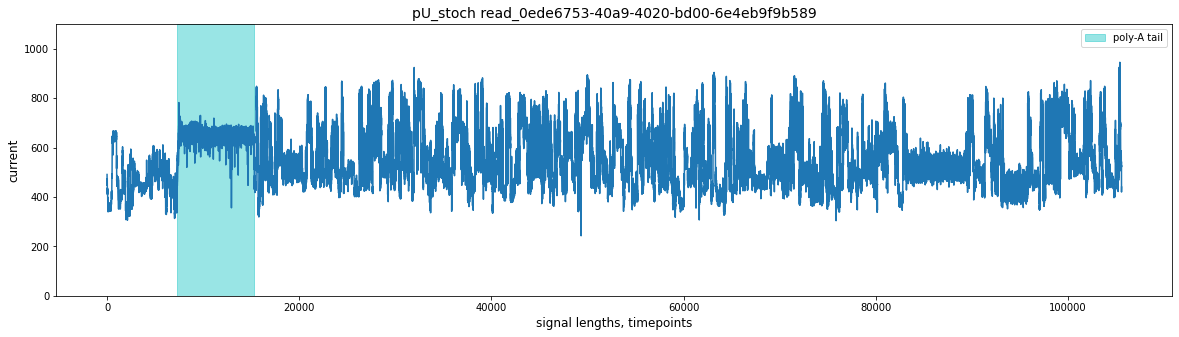

In [60]:
read0=data_sample_df.loc[5135][['read_id','signal','tail_start','tail_end','type']]
print(read0)
plt.figure(figsize=(20,5))
plt.plot(range(len(read0['signal'])),read0['signal'])
plt.axvspan(read0['tail_start'],read0['tail_end'],color='c',alpha=.4, label='poly-A tail')
plt.title(read0.type + ' '+read0.read_id, fontsize=14)
plt.xlabel('signal lengths, timepoints',  fontsize=12)
plt.ylabel('current',  fontsize=12)
plt.ylim(0,1100)
plt.legend()
plt.savefig(f'plots/tailfindr_{read0.type}_{read0.read_id}.png')

In [23]:
curlcakepath='/scratch/ONT_samuel/Novoa/curlcakes_1-4.txt'
curls=[]
curl_lengths=[]
with open(curlcakepath) as f:
    whole = f.read()
    curls_raw=whole.split('>')
    for curl_raw in curls_raw[1:]:
        curl=curl_raw[32:-2]
        curls.extend([curl])
    for curl in curls :
        curl_lengths.extend([len(curl)])
    f.close()
longest_curl,shortest_curl=max(curl_lengths),min(curl_lengths)

In [20]:
print(data_sample_df.shape[0])
data_sample_df=data_sample_df.dropna()
data_sample_cleaned_df=data_sample_df.drop(data_sample_df[data_sample_df['seq_length'] > 4000].index, ignore_)
data_sample_cleaned_df=data_sample_cleaned_df.drop(data_sample_cleaned_df[data_sample_cleaned_df['seq_length'] < 10].index)
data_sample_cleaned_df=data_sample_cleaned_df.drop(data_sample_cleaned_df[data_sample_cleaned_df['signal_length'] > 2e5].index)
print(data_sample_cleaned_df.shape[0])

5432
5255


In [2]:
sns.set(rc={'figure.figsize':(22,7)})
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('signal lengths distribution before cleaning')
ax2.set_title('signal lengths distribution after cleaning')
sns.violinplot(x=data_sample_df.type, y=data_sample_df.signal_length, data=data_sample_df,ax=ax1)
sns.violinplot(x=data_sample_cleaned_df.type, y=data_sample_cleaned_df.signal_length, data=data_sample_cleaned_df, ax=ax2)
ax2.set_ylim(0,1200)
plt.savefig('plots/violinplot_signal_lengths_per_mod.png')

NameError: name 'sns' is not defined

In [1]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('sequence length distribution before cleaning')
ax2.set_title('sequences length distribution after cleaning')
sns.violinplot(x=data_sample_df.type, y=data_sample_df.seq_length, data=data_sample_df, ax=ax1)
ax1.axhline(longest_curl, color='green',label='maximum curlcake length')
sns.violinplot(x=data_sample_cleaned_df.type, y=data_sample_cleaned_df.seq_length, data=data_sample_cleaned_df, ax=ax2)
ax2.axhline(longest_curl, color='green',label='maximum curlcake length')
ax2.set_ylim(0,12000)
ax1.legend()
ax2.legend()
plt.savefig('plots/violinplot_seq_lengths_per_mod.png')

NameError: name 'plt' is not defined

In [25]:
data_sample_cleaned_df.to_pickle('/home/tcastiglione/data/full_sample_df.pkl')